## Process workflows


In [1]:
import ruamel.yaml


def get_parsed_yaml_data(file_path):
    yaml = ruamel.yaml.YAML(typ="safe")
    with open(file_path, "r") as file:
        try:
            workflow_data = yaml.load(file)
            return workflow_data
        except:
            print(file_path)
            print(workflow_data)


def extract_triggers(file_path):
    yaml = ruamel.yaml.YAML(typ="safe")
    with open(file_path, "r") as file:
        try:
            workflow_data = yaml.load(file)
            triggers = workflow_data.get("on", {})
            return triggers
        except:
            print(file_path)
            print(workflow_data)


def extract_jobs_uses(file_path):
    yaml = ruamel.yaml.YAML(typ="safe")
    with open(file_path, "r") as file:
        try:
            workflow_data = yaml.load(file)
            # print(workflow_data)
            jobs = workflow_data.get("jobs", {})
            return jobs
        except:
            print(file_path)
            print(workflow_data)


def extract_workflow_name(file_path):
    yaml = ruamel.yaml.YAML(typ="safe")
    with open(file_path, "r") as file:
        try:
            workflow_data = yaml.load(file)
            # print(workflow_data)
            workflow_name = workflow_data.get("name", "")
            return workflow_name
        except:
            print(file_path)
            print(workflow_data)

In [2]:
import os

gha_workflow_sequences = []
directory = "./workflows_latest"
len(os.listdir(directory))

149941

In [5]:
import os

gha_workflow_sequences = []
directory = "./workflows_latest"

for filename in os.listdir(directory):
    file_path = os.path.join(directory, filename)

    if os.path.isfile(file_path):
        try:
            triggers = extract_triggers(file_path)
            jobs = extract_jobs_uses(file_path)
            if jobs:
                for job_name, job_info in jobs.items():
                    sequence = []

                    if job_info.get("uses", ""):
                        sequence.append(job_info["uses"])
                    for step in job_info.get("steps", []):
                        if step.get("uses", ""):
                            sequence.append(step["uses"].split("@")[0])
                        if step.get("run", ""):
                            for run_command in step["run"].split("\n"):
                                if run_command:
                                    sequence.append(run_command)

                sequence_metadata = {
                    "file": filename,
                    "file_path": file_path,
                    "job_name": job_name,
                    "sequence": sequence,
                    "triggers": triggers,
                }
                gha_workflow_sequences.append(sequence_metadata)
        except Exception as error:
            print("ERROR:")
            print(error)

./workflows_latest/b61c005335338aea48822acfe20a0da5a16599cd8cb479b177cd351a68ca7f8d
None
./workflows_latest/b61c005335338aea48822acfe20a0da5a16599cd8cb479b177cd351a68ca7f8d
None
./workflows_latest/f140fc2187d932359ccb4d8add9806d8ec843437cdb07febaa3fd8f2207cdcf3
ERROR:
local variable 'workflow_data' referenced before assignment
./workflows_latest/44572859f85477caf8db4a3163401f1cae19dece1e382bd000e092acf0946c5b
ERROR:
local variable 'workflow_data' referenced before assignment
./workflows_latest/89575a1b9decc4f56cec8b0ec15e92e5ad159144af2614f438d2943c5442a4f2
ERROR:
local variable 'workflow_data' referenced before assignment
./workflows_latest/055f61e1876171d3f102382801f5101144df16e74e1c5fcb9b3e1690d4c8717b
ERROR:
local variable 'workflow_data' referenced before assignment
./workflows_latest/7097b7f20fd5a65709365931807d1ab7767529a641a0efffa303875523244693
ERROR:
local variable 'workflow_data' referenced before assignment
./workflows_latest/e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b934c

In [6]:
len(gha_workflow_sequences)

149131

## Use SPADE algo


### uses and runs


In [4]:
import os
import subprocess
import re


def change_links_to_keyword(text):
    url_pattern = r"(https?://\S+)"
    modified_text = re.sub(url_pattern, "LINK", text)
    return modified_text


gha_workflow_sequences = []
directory = "./workflows_latest"

all_run_commands = 0
multiline_run_commands = 0
multiline_run_commands_with_space = 0
all_uses_commands = 0

commands_count = dict()

for filename in os.listdir(directory):
    file_path = os.path.join(directory, filename)

    if os.path.isfile(file_path):
        try:
            triggers = extract_triggers(file_path)
            jobs = extract_jobs_uses(file_path)
            if jobs:
                for job_name, job_info in jobs.items():
                    sequence = []

                    if job_info.get("uses", ""):
                        sequence.append(job_info["uses"])
                    for step in job_info.get("steps", []):
                        if step.get("uses", ""):
                            all_uses_commands += 1
                            uses_command = step["uses"].split("@")[0]
                            sequence.append(uses_command)
                            if uses_command not in commands_count:
                                commands_count[uses_command] = 0
                            commands_count[uses_command] += 1
                        if step.get("run", ""):
                            run_commands = step["run"].split("\n")
                            if len(run_commands) > 1:
                                multiline_run_commands += 1
                            else:
                                all_run_commands += 1

                            for run_command in run_commands:
                                if run_command.startswith(" "):
                                    multiline_run_commands_with_space += 1
                                    break

                            for run_command in run_commands:
                                if run_command and (not run_command.startswith("# ")):
                                    changed_run_command = change_links_to_keyword(
                                        run_command
                                    )
                                    sequence.append(changed_run_command)
                                    if changed_run_command not in commands_count:
                                        commands_count[changed_run_command] = 0
                                    commands_count[changed_run_command] += 1

                    sequence_metadata = {
                        "file": filename,
                        "file_path": file_path,
                        "job_name": job_name,
                        "sequence": sequence,
                        "triggers": triggers,
                    }
                    gha_workflow_sequences.append(sequence_metadata)
        except Exception as error:
            c = 0
            # print(f"ERROR processing file {filename}: {error}")

./workflows_latest/b61c005335338aea48822acfe20a0da5a16599cd8cb479b177cd351a68ca7f8d
None
./workflows_latest/b61c005335338aea48822acfe20a0da5a16599cd8cb479b177cd351a68ca7f8d
None
./workflows_latest/f140fc2187d932359ccb4d8add9806d8ec843437cdb07febaa3fd8f2207cdcf3
./workflows_latest/44572859f85477caf8db4a3163401f1cae19dece1e382bd000e092acf0946c5b
./workflows_latest/89575a1b9decc4f56cec8b0ec15e92e5ad159144af2614f438d2943c5442a4f2
./workflows_latest/055f61e1876171d3f102382801f5101144df16e74e1c5fcb9b3e1690d4c8717b
./workflows_latest/7097b7f20fd5a65709365931807d1ab7767529a641a0efffa303875523244693
./workflows_latest/e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b934ca495991b7852b855
None
./workflows_latest/e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b934ca495991b7852b855
None
./workflows_latest/dcf68d8a5d786971fdd9821f9314b4e09c41965b566090e69e0a8800d92d68eb
None
./workflows_latest/dcf68d8a5d786971fdd9821f9314b4e09c41965b566090e69e0a8800d92d68eb
None
./workflows_latest/c65badd8a24da1e8fdce4846faf

In [1]:
def plot_commands(data):
    NUM_OF_TOP_COMMANDS = 2000
    plt.figure(figsize=(15, 5))
    data = sorted(data.items(), key=lambda x: x[1], reverse=True)[:100]
    plt.scatter(
        [item[0] for item in data[:NUM_OF_TOP_COMMANDS]].append("Other"),
        [item[1] for item in data[:NUM_OF_TOP_COMMANDS]].append(
            sum([item[1] for item in data[NUM_OF_TOP_COMMANDS:]])
        ),
        color="maroon",
    )

    plt.xlabel("command")
    plt.xticks(rotation=90)
    plt.ylabel("No. of commands")
    plt.title("commands vs frequency")
    plt.show()

In [2]:
data = sorted(commands_count.items(), key=lambda x: x[1], reverse=True)

NameError: name 'commands_count' is not defined

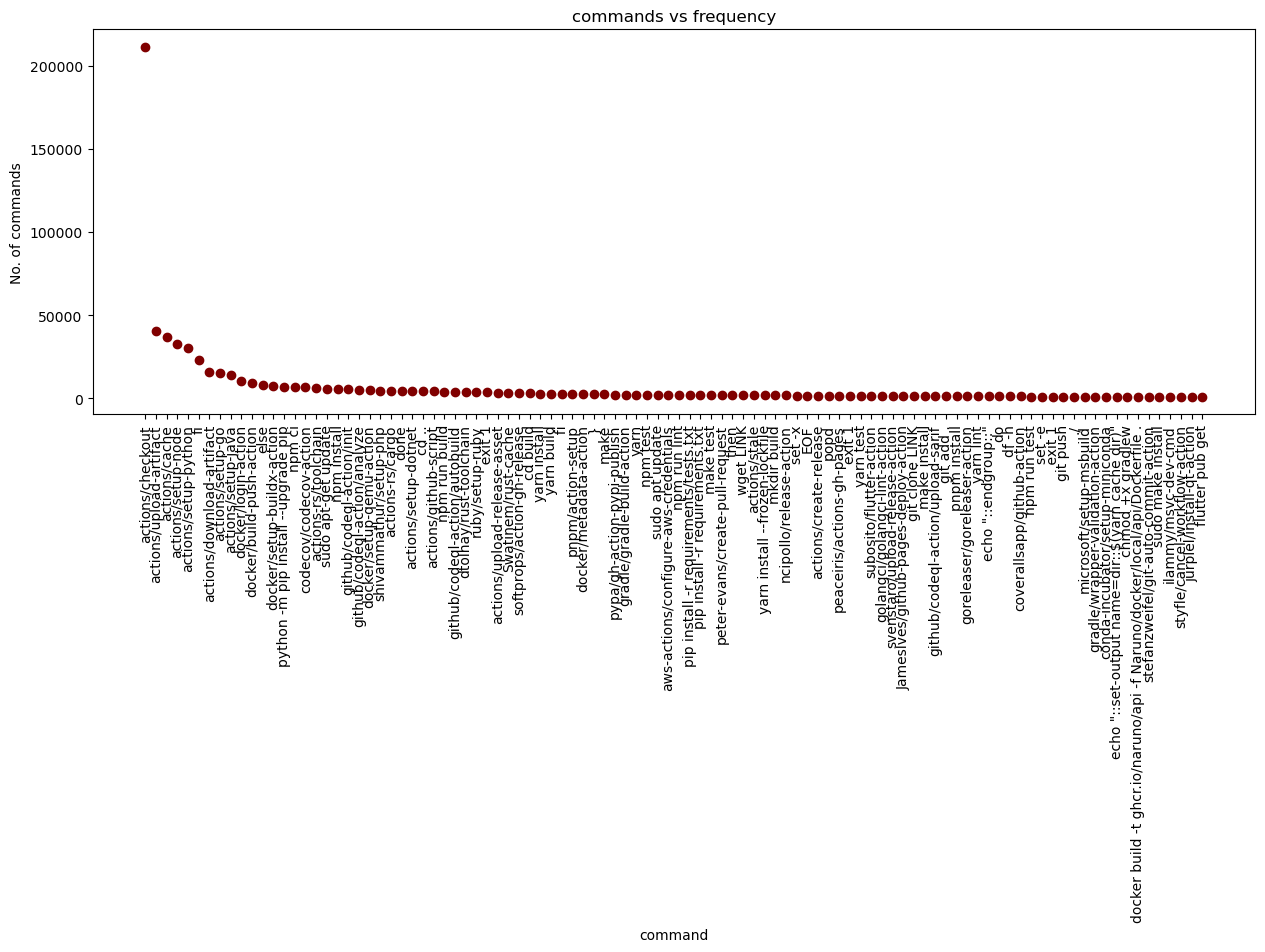

In [96]:
plot_commands(commands_count)

In [79]:
create_spmf_input_file(gha_workflow_sequences, "spmf_input_human_only_uses_and_run.txt")

In [19]:
# all_run_commands = 0
# multiline_run_commands = 0
# all_uses_commands = 0
print(f"All runs: {all_run_commands}")
print(f"All multiline runs: {multiline_run_commands}")
print(
    f"All multiline_run_commands_with_space runs: {multiline_run_commands_with_space}"
)
print(f"All multiline runs to runs: {(100/all_run_commands)*multiline_run_commands}")
print(
    f"All multiline runs to runs: {(100/all_run_commands)*multiline_run_commands_with_space}"
)
print(f"All uses: {all_uses_commands}")
print(f"All uses and runs: {all_uses_commands+multiline_run_commands}")

All runs: 337921
All multiline runs: 272084
All multiline_run_commands_with_space runs: 40122
All multiline runs to runs: 80.51704392446756
All multiline runs to runs: 11.873189295722964
All uses: 658374
All uses and runs: 930458


In [ ]:
# Do an Earls comment without abstraction
# Check how many runs are multiline
# Split && commands later
# Change https link to LINK

In [21]:
reverse_item_mapping = {v: k for k, v in item_map.items()}


def replace_numbers_with_keys(content, mapping):
    lines = content.split("\n")
    updated_lines = []

    for line in lines:
        parts = line.split()
        updated_line = []

        for part in parts:
            if part.isdigit() and int(part) in mapping:
                updated_line.append(mapping[int(part)])
            else:
                updated_line.append(part)

        updated_lines.append(" ".join(updated_line))

    return "\n".join(updated_lines)


file_path = "./spmf_output.txt"  # Replace with your file path
with open(file_path, "r") as file:
    file_content = file.read()

updated_content = replace_numbers_with_keys(file_content, reverse_item_mapping)
updated_content

## Test on all transactions


## Test divided by triggers


In [11]:
transactions_by_trigger = dict()

for gha_workflow_sequence in gha_workflow_sequences:
    sequence = gha_workflow_sequence["sequence"]
    triggers = gha_workflow_sequence["triggers"]

    if isinstance(triggers, list):
        for trigger_type in triggers:
            if trigger_type not in transactions_by_trigger:
                transactions_by_trigger[trigger_type] = []
            transactions_by_trigger[trigger_type].append(sequence)
    elif isinstance(triggers, str):
        if triggers not in transactions_by_trigger:
            transactions_by_trigger[triggers] = []
        transactions_by_trigger[triggers].append(sequence)
    else:
        for trigger_type, trigger_config in triggers.items():
            if trigger_type not in transactions_by_trigger:
                transactions_by_trigger[trigger_type] = []
            transactions_by_trigger[trigger_type].append(sequence)

In [12]:
for trigger_type, trigger_transactions in transactions_by_trigger.items():
    print(trigger_type)

pull_request
push
workflow_dispatch
schedule
release
workflow_call
issues
repository_dispatch
pull_request_target
issue_comment
discussion
project_card
workflow_run
merge_group
check_suite
branch_protection_rule
delete
milestone
create


In [13]:
from gsppy.gsp import GSP

for trigger_type, trigger_transactions in transactions_by_trigger.items():
    trigger_result = GSP(trigger_transactions).search(0.3)
    print(trigger_type)
    display(trigger_result)
    print("_" * 20)

pull_request


[{('actions/checkout',): 560}]

____________________
push


[{('actions/checkout',): 786}]

____________________
workflow_dispatch


[{('actions/checkout',): 332}]

____________________
schedule


[{('actions/checkout',): 304}]

____________________
release


[{('actions/checkout',): 50}]

____________________
workflow_call


[{('actions/checkout',): 59}]

____________________
issues


[]

____________________
repository_dispatch


[{('test -e ${{ env.BUNDLE_GEMFILE }}.lock',): 50,
  ('ruby/setup-ruby',): 50,
  ('actions/checkout',): 68},
 {('actions/checkout', 'test -e ${{ env.BUNDLE_GEMFILE }}.lock'): 44,
  ('test -e ${{ env.BUNDLE_GEMFILE }}.lock', 'ruby/setup-ruby'): 50},
 {('actions/checkout',
   'test -e ${{ env.BUNDLE_GEMFILE }}.lock',
   'ruby/setup-ruby'): 44}]

____________________
pull_request_target


[{('actions/cache',): 15, ('actions/checkout',): 30}]

____________________
issue_comment


[{('actions/cache',): 2, ('actions/checkout',): 2, ('yarn install',): 2},
 {('actions/cache', 'yarn install'): 2,
  ('actions/checkout', 'actions/cache'): 2},
 {('actions/checkout', 'actions/cache', 'yarn install'): 2}]

____________________
discussion


[]

____________________


KeyboardInterrupt: 